# Ingeniería de Caracteres
## Estudiantes:
### Carlos Cerro
### Daniel Pinto

Lo primero que vamos a realizar, es a traer la base de datos de las carcterísticas de los jugadores. Nos conectaremos a la bd que se encuentra guardada en Google Drive y de ahí obtendremos los datos

In [0]:
#Librerias importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import sqlite3
import scipy.stats as ss


In [3]:
#Obtenemos acceso a google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Ruta para obtener los datos
ruta = '/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/'
bd = ruta +'database.sqlite'

In [0]:
conn = sqlite3.connect(bd)

In [6]:
data = pd.read_sql("""SELECT *
                              FROM Player_Attributes;""", conn)
data.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

# Limpieza de la base de datos
En esta sección haremos la limpieza de los datos y su tratamiento adecuado para poder realizar la ingeniería de característica 

In [0]:
#Eliminar filas con datos nulos
data = data.dropna() 

In [8]:
newdata = data.drop(["id","player_fifa_api_id","player_api_id","date"],axis = 1)
newdata

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [9]:
newdata.duplicated()
newdata = newdata.drop_duplicates()
newdata

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [10]:
# modo alternativo de binarizar en pandas: newdata["preferred_foot_bin"] = newdata["preferred_foot"].apply(lambda val: 1 if val == "right" else 0)
#Binarizamos la variable resultado, que en nuestro caso es si el pie preferido
#del jugador es el izquierdo o el derecho
enc = LabelEncoder()
newdata["preferred_foot_bin"] = enc.fit_transform(newdata["preferred_foot"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# Eliminar filas en las que los valores de attacking_work_rate o defensive_work_rate son diferentes de low, medium o high.
newdata = newdata.drop(newdata[(newdata.attacking_work_rate != "low") & (newdata.attacking_work_rate != "medium") & (newdata.attacking_work_rate != "high")].index)
newdata = newdata.drop(newdata[(newdata.defensive_work_rate != "low") & (newdata.defensive_work_rate != "medium") & (newdata.defensive_work_rate != "high")].index)
newdata

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_bin
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1
5,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,0
6,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,1
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,1


In [12]:
#Procedemos a dummizar las variables attacking_work_rate y defensive_work_rate
#Hay un problema al dummizar las variables, quedan repetidas las columnas low, medium y high dos veces.
newcols = pd.get_dummies(newdata["attacking_work_rate"])
newcols1 = pd.get_dummies(newdata["defensive_work_rate"])
newcols.rename(columns={'low':'low_attacking','medium':'medium_attacking','high':'high_attacking'}, inplace=True)
newcols = newcols.reset_index(drop=True)
newcols1 = newcols1.reset_index(drop = True)

#Luego obtenemos procedemos a separar las variables númericas en X_num
#y también separamos la variable resultado en la variable "Y"
X_num = newdata.drop(["preferred_foot", "attacking_work_rate", "defensive_work_rate","preferred_foot_bin"], axis = 1)
Y = newdata[["preferred_foot_bin"]]
Y = Y.reset_index(drop = True)

#Normalizamos las variables numericas X_num
from sklearn import preprocessing
x = X_num.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled, columns=X_num.columns)

#Por último añadimos las variables dummizadas a la bd númerica normalizad 
X = pd.concat([X_norm, newcols, newcols1], axis=1)
X

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,high_attacking,low_attacking,medium_attacking,high,low,medium
0,0.557377,0.551724,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.714286,0.726316,0.462366,0.552083,0.489362,0.688172,0.723404,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684,0,0,1,0,0,1
1,0.475410,0.465517,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.626374,0.421053,0.462366,0.552083,0.489362,0.688172,0.691489,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684,0,0,1,0,0,1
2,0.459016,0.448276,0.500000,0.437500,0.711340,0.606383,0.456522,0.510417,0.456522,0.385417,0.638298,0.467391,0.559524,0.611765,0.564706,0.367089,0.630952,0.547368,0.536585,0.511628,0.767442,0.347368,0.615385,0.410526,0.451613,0.541667,0.478723,0.655914,0.659574,0.688172,0.043011,0.097826,0.083333,0.063158,0.063158,0,0,1,0,0,1
3,0.672131,0.637931,0.840426,0.541667,0.587629,0.723404,0.423913,0.750000,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.642105,0.681319,0.694737,0.623656,0.677083,0.606383,0.806452,0.787234,0.817204,0.139785,0.065217,0.083333,0.084211,0.115789,1,0,0,0,0,1
4,0.672131,0.637931,0.840426,0.541667,0.587629,0.723404,0.336957,0.750000,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.621053,0.681319,0.694737,0.623656,0.677083,0.606383,0.806452,0.787234,0.817204,0.139785,0.065217,0.083333,0.084211,0.115789,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132911,0.819672,0.793103,0.882979,0.791667,0.597938,0.914894,0.826087,0.864583,0.913043,0.802083,0.861702,0.869565,0.630952,0.705882,0.776471,0.873418,0.726190,0.778947,0.536585,0.720930,0.662791,0.842105,0.549451,0.810526,0.903226,0.906250,0.861702,0.225806,0.319149,0.301075,0.086022,0.206522,0.864583,0.200000,0.200000,0,0,1,0,1,0
132912,0.737705,0.706897,0.776596,0.781250,0.536082,0.861702,0.826087,0.875000,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.604396,0.663158,0.752688,0.906250,0.723404,0.333333,0.319149,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000,0,0,1,0,1,0
132913,0.721311,0.706897,0.776596,0.729167,0.536082,0.861702,0.826087,0.875000,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.670330,0.663158,0.752688,0.906250,0.723404,0.333333,0.319149,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000,0,0,1,0,1,0
132914,0.737705,0.724138,0.776596,0.656250,0.577320,0.882979,0.826087,0.895833,0.913043,0.750000,0.744681,0.934783,0.571429,0.564706,0.776471,0.658228,0.726190,0.736842,0.536585,0.662791,0.569767,0.810526,0.626374,0.652632,0.709677,0.906250,0.542553,0.290323,0.329787,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000,0,0,1,0,1,0


# Relaciones entre variables
En esta sección pretendemos realizar los correlogramas de nuestras variables normalizadas. Se utilizarán los métodos de Pearson, Kendall y Spearman. Luego haremos un cross tab de nuestras dos variables categoricas para conocer la relación entre estás dos. Por último realizaremos la entropía de Shannon para determinar que tanta información se obtiene con cada una de las variables

## Tabulaciones cruzadas

In [13]:
print(pd.crosstab(newdata.attacking_work_rate, newdata.defensive_work_rate))

defensive_work_rate   high   low  medium
attacking_work_rate                     
high                  6401  4236   22105
low                   2605   544    3533
medium               12289  8947   72256


In [0]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [15]:
cramers_v(newdata.attacking_work_rate, newdata.defensive_work_rate)

0.12203009638247342

## Correlogramas

In [0]:
#Crear la matriz de correlaciones con cada uno de los métodos mencionados
corr_pearson = X_norm.corr(method='pearson')
corr_kendall = X_norm.corr(method='kendall')
corr_spearman = X_norm.corr(method='spearman')

In [0]:
#corr_spearman.to_excel('/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/spearman.xlsx')
#corr_kendall.to_excel('/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/kendall.xlsx')
#corr_pearson.to_excel('/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/pearson.xlsx')

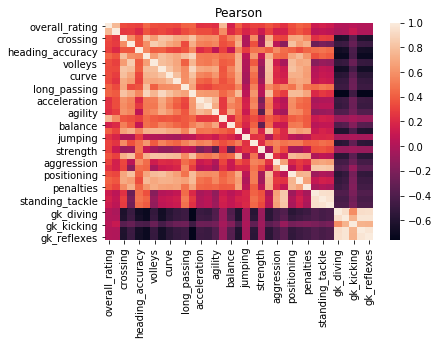

In [0]:
#Observemos primero el correlograma de pearson
ax = plt.axes()
sns.heatmap(corr_pearson)
ax.set_title('Pearson')
plt.show()

Por el correlograma de pearson anterior, podemos observar que las variables de habilidades en el arco, están muy correlacionadas entre ellas, por lo tanto proponemos generar una variable indicador con el promedio de estás y de esta manera dejar un "overall_gk" que me resuma las habilidades en el arco

In [0]:
X['overall_gk']=X.loc[:,['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']].mean(axis=1)
#Por lo tanto ya no es necesario tener el resto de variables
X.drop(['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes'], axis=1, inplace= True)

A continuación observamos los correlogramas de Kendall y Spearman, con ellos tomamos las decisiones sobre las variables nominales que vamos a utilizar

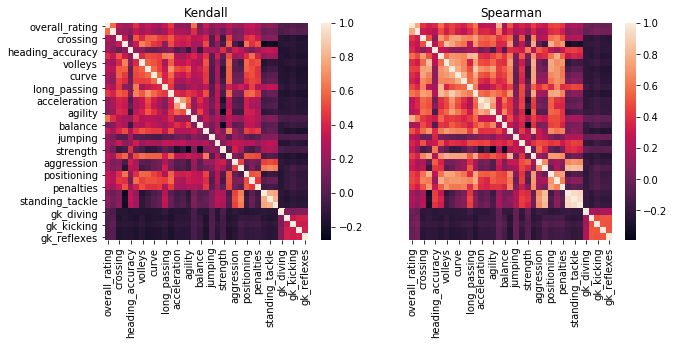

In [0]:
#Graficamos los correlogramas de Kendall y Spearman
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


sns.heatmap(data=corr_kendall, ax=ax1)
sns.heatmap(data=corr_spearman, ax=ax2, yticklabels=False)

ax1.set_title('Kendall')
ax2.set_title('Spearman')
plt.show()

La variable "marking" esta muy correlacionada (con los métodos de Kendall, Spearman y Pearson) con "standing_tackle", "sliding_tackle" y con "interceptions". Por lo tanto utilizando la variable "marking" estaríamos utilizando información de este resto de variables

Ahora observando habilidades un poco más técnicas de los jugadores, la variable "ball_control" tiene una relación alta con "short_passing" y "driblling", lo que nos indica que "ball_control" puede explicar estas dos variables.

In [0]:
#Procedemos a prescindir de las variables "standing tackle", "sliding_tackle",
# "interceptions", "driblling" y "short_passing"
X.drop(["standing_tackle", "sliding_tackle", 
        "interceptions", "dribbling" ,"short_passing"], axis=1, inplace= True)


Por último, pretendemos a realizar la correlación de punto biserial, que ayuda a determinar la relación entre una variable binaria y una variable númerica

In [0]:
#Lista de númericas
x_num_names = X.columns.to_list()
x_num_names.remove('high_attacking')
x_num_names.remove('low_attacking')
x_num_names.remove('medium_attacking')
x_num_names.remove('high'),
x_num_names.remove('low')
x_num_names.remove('medium')
#Lista de dicotomicas
x_dic_names = ['high_attacking',
 'low_attacking',
 'medium_attacking',
 'high',
 'low',
 'medium']

In [0]:
iterables = [['high_attacking','low_attacking', 'medium_attacking', 'high','low','medium'],['correlation','pvalue']]
idx = pd.MultiIndex.from_product(iterables, names=['variable', 'estadistico'])
df = pd.DataFrame('-', idx, x_num_names)

In [0]:
for i in x_num_names:
  for j in x_dic_names:
    df.loc[(j,'correlation'),i] =pointbiserialr(X.loc[:,i], X.loc[:,j]).correlation
    df.loc[(j,'pvalue'),i] = pointbiserialr(X.loc[:,i], X.loc[:,j]).pvalue

In [97]:
df

overall_rating  ...    overall_gk
variable         estadistico                 ...              
high_attacking   correlation       0.147504  ...     -0.175087
                 pvalue                   0  ...             0
low_attacking    correlation      0.0052649  ...    -0.0592898
                 pvalue           0.0549268  ...  8.50433e-104
medium_attacking correlation      -0.141663  ...      0.193528
                 pvalue                   0  ...             0
high             correlation       0.127669  ...     -0.123346
                 pvalue                   0  ...             0
low              correlation      0.0610024  ...    -0.0921641
                 pvalue        8.91216e-110  ...  1.47485e-248
medium           correlation      -0.148445  ...      0.166372
                 pvalue                   0  ...             0

[12 rows x 26 columns]

Por los resultados obtenidos por la correlación biserial, se determinó que las variables binarias no se explican fuertemente con las númericas, por lo tanto debemos utilizar estas variables en el modelo

# Trabajo posterior
Dentro del trabajo siguiente se propone utilizar una metodología de envolvente, donde se busque mejorar la precisión de los modelos propuestos